# Grouping your data


In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True # show gridlines by default
%matplotlib inline

import pandas as pd

## Experimenting with Split-Apply-Combine – Summary reports

In the last module, you downloaded data from Comtrade that could be described
as ‘heterogenous’ or mixed in some way. For example, the same dataset contained
information relating to both imports and exports.
To find the partner countries with the largest trade value in terms of exports means filtering
the dataset to obtain just the rows containing export data and then ranking those. Finding
the largest import partner requires a sort on just the import data.

But what if you wanted to find out even more refined information? For example:
- the total value of exports of product X from the UK to those countries on a year by
year basis (group the information by year and then find the total for each year)

- the total value of exports of product X from the UK to each of the partner countries by
year (group the information by country and year and then find the total for each
country/year pairing)

- the average value of exports across all the countries on a month by month basis
(group by month, then find the average value per month)

- the average value of exports across each country on a month by month basis (group
by month and country, then find the average value over each country/month pairing)

- the difference month on month between the value of imports from, or exports to, each
particular country over the five year period (group by country, order by month and
year, then find the difference between consecutive months).


In each case, the original dataset needs to be separated into several subsets, or groups of
data rows, and then some operation performed on those rows. To generate a single, final
report would then require combining the results of those operations in a new or extended
dataframe.

This sequence of operations is common enough for it to have been described as the ‘split-
apply-combine’ pattern. The sequence is to:
- ‘split’ an appropriately shaped dataset into several components
- ‘apply’ an operator to the rows contained within a component
- ‘combine’ the results of applying to operator to each component to return a single
combined result.

Having learned how to group data using the `groupby()` method, You will see how to make use of this pattern using pandas and start to put those groups to work.

## Splitting a dataset by grouping

‘Grouping’ refers to the process of splitting a dataset into sets of rows, or ‘groups’, on the
basis of one or more criteria associated with each data row.
Grouping is often used to split a dataset into one or more distinct groups. Each row in the
dataset being grouped around can be assigned to one, and only one, of the derived
groups. The rows associated with a particular group may be accessed by reference to the
group or the same processing or reporting operation may be applied to the rows contained
in each group on a group by group basis.

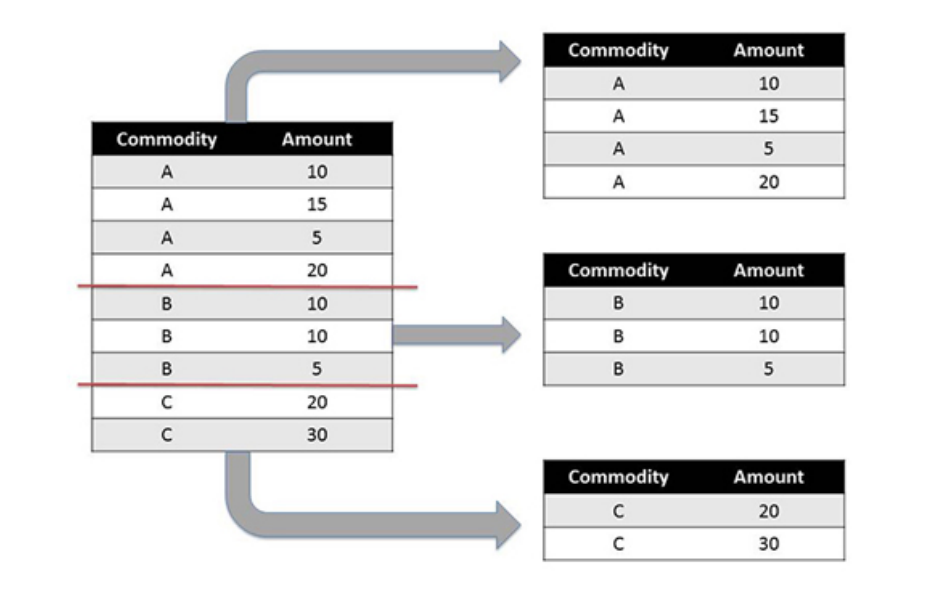

The rows do not have to be ‘grouped’ together in the original dataset – they could appear
in any order in the original dataset (for example, a commodity A row, followed by a two
commodity B rows, then another commodity A row, and so on). However, the order in
which each row appears in the original dataset will typically be reflected by the order in
which the rows appear in each subgroup.
Let’s see how to do that in pandas. Create a simple dataframe that looks like the full table
in the image above:

In [ ]:
data=[['A',10],['A',15],['A',5],['A',20],
['B',10],['B',10],['B',5],
['C',20],['C',30]]

df = pd.DataFrame(data=data, columns=["Commodity","Amount"])
df

Next, use the `groupby()` method to group the dataframe into separate groups of rows
based on the values contained within one or more specified ‘key’ columns. For example,
group the rows according to what sort of commodity each row corresponds to as specified
by the value taken in the ‘Commodity’ column.

In [ ]:
grouped = df.groupby('Commodity')

The number and ‘names’ of the groups that are identified correspond to the unique values
that can be found within the column or columns (which will be referred to as the ‘key
columns’) used to identify the groups.
You can see what groups are available with the following method call:

In [ ]:
grouped.groups.keys()

The `get_group()` method can be used to grab just the rows associated with a particular
group.

In [ ]:
grouped.get_group('B')

Datasets can also be grouped against multiple columns. For example, if there was an
extra ‘Year’ column in the above table, you could group against just the commodity,
exactly as above, to provide access to rows by commodity; just the year, setting `grouped
= df.groupby( 'Year' )`; or by both commodity and year, passing in the two grouping
key columns as a list:

In [ ]:
grouped = df.groupby( ['Commodity','Year'])

The list of keys associated with the groups might then look like [(‘A’, 2015), (‘A’, 2014),
(‘B’, 2015), (‘B’, 2014)]. The rows associated with the group corresponding to commodity
A in 2014 could then be retrieved using the command:

In [ ]:
grouped.get_group( ('A',2014) )

This may seem to you like a roundabout way of filtering the dataframe as you did before; but you’ll see that the ability to automatically group rows sets up the possibility of
then processing those rows as separate ‘mini-dataframes’ and then combining the results
back together.

**Task: Grouping data**
    
- As you complete the tasks, think about these questions:

- For your particular dataset, how did you group the data and what questions did
you ask of it? 

- Which countries were the major partners of your reporter country for
the different groupings?

- With the ability to group data so easily, what other sorts of questions would you
like to be able to ask?